<Figure size 720x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

样本被分为了3类
其中有1021个点未被聚类
聚类率为74%
ARI= 0.9860032164933338


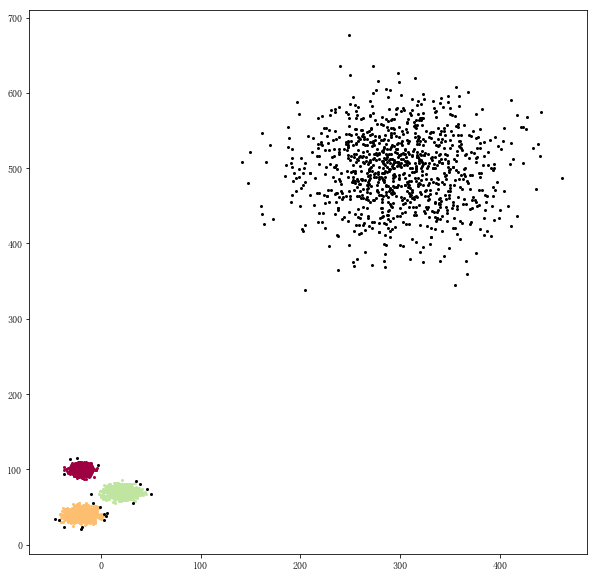

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
%matplotlib inline
sampleNo = 1000
x=np.random.normal(loc=[-20,-20,20,300],scale=[5,8,8,50],size=(sampleNo,4))
y=np.random.normal(loc=[100,40,70,500],scale=[4,5,5,50],size=(sampleNo,4))
color=['blue','red','black','green']
fig=plt.figure(figsize=(10,10))
for i in range(0,4):
    pass
    #plt.scatter(x[:,i],y[:,i],color='red',marker='.')
plt.show()
data=pd.DataFrame({'x':x[:,0],'y':y[:,0],'label':'blue'})
for i in range(1,4):
    data=data.append(pd.DataFrame({'x':x[:,i],'y':y[:,i],'label':color[i]}),ignore_index=True)
from IPython.display import display
#display(data)

from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(data.drop('label',axis=1),data['label'])
from sklearn.cluster import DBSCAN
model_DBSCAN=DBSCAN(eps=5,min_samples=20)
model_DBSCAN.fit(data.drop('label',axis=1))
labels=model_DBSCAN.labels_
clusters=list(set(labels))
n_clusters=len(clusters)-(1 if -1 in labels else 0)
n_noise=list(labels).count(-1)
print('样本被分为了%d类'%n_clusters)
print('其中有%d个点未被聚类'%n_noise)
print('聚类率为%d%%'%(100-n_noise/data.shape[0]*100))
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(clusters))]
color=pd.Series(colors,index=clusters)
color[-1]=(0,0,0,1)
data0=data.copy()
data0['cluster']=labels
fig2=plt.figure(figsize=(10,10))
for i in clusters:
    tempdata=data0[data0['cluster']==i]
    plt.scatter(tempdata['x'],tempdata['y'],c=color[i],s=4)
from sklearn.metrics import silhouette_score
silhouette_score(data.drop('label',axis=1),labels, metric='euclidean')
from sklearn.metrics import adjusted_rand_score
print('ARI=',adjusted_rand_score(data['label'],model_DBSCAN.labels_))